In [50]:
title = "Assessing Pareto Distribution in Movie Utterances: Implications for Semantic Vectorization and Information Retention in Matrix Reconstruction"

title.lower().replace(" ", "_").split(":")[0]

'assessing_pareto_distribution_in_movie_utterances'

<!-- FIRST TITLE -->
<!-- # Preservation of Semantics Through Various Text Vectorization Methods on a Movie Dialouge Corpus: A Statistical Comparison -->

<!-- SECOND TITLE -->
<!-- # Output Of Different Semantic Text Vectorization Methods: A Statistical Comparison -->

<!-- THIRD TITLE -->
<!-- # Principle Component Analysis on The Output of Different Semantic Text Vectorization Methods: A Statistical Study -->

<!-- FIRST CHATGPT TITLE -->
<!-- # Quantifying Information Retention in Matrix Reconstruction: A Comparative Analysis of Semantic Vectorization Methods Using PCA -->

<!-- FINAL TITLE -->
# Assessing Pareto Distribution in Movie Utterances: Implications for Semantic Vectorization and Information Retention in Matrix Reconstruction

**Author(s)**  
Enden, L. van den  
453142@student.fontys.com  

**Course/Institution Name**  
AP-STATS  
Fontys University of Applied Sciences

**Date**  
October 29, 2024

## Abstract
This study investigates whether the lengths of movie utterances follow a Pareto distribution, a characteristic often observed in linguistic datasets where a small number of long utterances accompany a majority of shorter ones. This research forms part of a larger analysis aimed at evaluating and comparing the effectiveness of various semantic vectorization methods in retaining information during matrix reconstruction. Specifically, we seek to determine the number of Principal Component Analysis (PCA) components required to preserve at least 80% of the original information across different vectorization approaches. The methods for vectorization will be treated as black boxes, focusing on their capacity for information retention rather than the techniques themselves. The results of this study will contribute to understanding how well these semantic methods capture meaningful patterns within complex, real-world text data.

### Added Context: Research Goal For The Larger Study
The goal of the larger research study is to evaluate and compare the effectiveness of different semantic vectorization methods in retaining information during matrix reconstruction, by analyzing the number of Principal Component Analysis (PCA) components required to preserve at least 80% of the original information across various vectorization approaches.

The semantic vectorization methods will be determined later in this document and will be treated as black boxes for the purpose of this study. The focus will be on the effectiveness of these methods in retaining information during matrix reconstruction, rather than the specifics of the vectorization techniques themselves.

![The flow of the experiment](./data_flow.png)

## Type of study
This study uses statistical methods to compare the outcomes of different text vectorization methods, focusing on the statistical comparison of matrices. Additionally, it incorporates hypothesis testing on the corpus to validate underlying assumptions.

<!-- FEEDBACK FROM TEACHER: be wary of the fact that you dont change your hypothesis midway trough your study based on findings -->
## Hypotheses Tested In This Research

The following hypotheses are tested in this research:
<!-- 1. All the different text vectorization methods will produce a sparse matrix as output. -->
<!-- QUESTION FOR TEACHER: this isnt really a statistical question is it? depending on how a sparse matrix is defined and how you detirmine this, this either is or isnt a question of statistics -->
<!-- FEEDBACK: do you need to see this as a sparse matrix, or can you just view it as a matrix -->

<!-- 1. The resulting matrixes from different text vectorization methods are statistically different. -->
<!-- QUESTION FOR TEACHER: this seems like a proper null hypotheses I can test using statistical methods, like comparing disrtibutions on a corpus entry level -->
<!-- FEEDBACK: its a bit to vague, lets brainstorm some ideas for a hypotheses together -->

<!-- Brainstorm for hypotheses:
Hoeveel informatie zit er in de matrix? In andere woorden:
- Ik heb 100 cooficienten (losse vector waardes), hoeveel cooficienten heb ik nodig om de matrix terug te construeren zonder informatie te verliezen?
    - Voor iedere vectorizatie methode, hoeveel PCA componenten heb ik nodig om minimaal 80% van de informatie te behouden?
    - Welke van de vectorisatie methodes heeft het minsten componenten nodig?
- Is de ene matrix meer sparser dan de ander?
-->

<!-- TODO: put the stuf bellow in a more formal hypotheses (incorperate the use of principal component analysis as reduction method and 'explained mean variance' for matrix reconstruction method) -->

<!-- 1. The length of documents in my corpus follow a pareto distribution -->
<!-- HYPOTHESES 1 is used to show learning outcome mastery. Putting it into other words: 20% of the sentences contain 80% of the total grammatical content -->
<!-- 2. Does Zyphs law hold true for my corpus -->
<!-- HYPOTHESES 2 is somewhat similair to 1 (both are essentially the 80/20 rule), but zyphs states that 80% of the grammatical content is represented by 20% of the set of words -->
<!-- 3. How much information is in the matrix? In other words:
    - I have 100 cooficients (single vector values), how many cooficients do I need to construct the matrix back without losing information?
    - For each vectorization method, how many PCA components do I need to retain at least 80% of the information?
    - Which of the vectorization methods needs the fewest components? -->
<!-- HYPOTHESES 3 is their for when I have time to spare -->

<!-- 
Hypohteses bellow is an old one but is not really an interesting hypotheses, its simply a sanity check to do as intermediate steps
- Is one matrix more sparser than the other? 
-->

<!--
Feedback Mark op research status:
- test of corpus pareto distributie is (aldus de len(utter) distributie)
- als ik een distributie heb (hypothese is dat dit pareto distributie is, null variant is dit is niet ...), hoe test ik dit?
	Dit is eigenlijk niet meer dan de formule opzoeken voor het checken van pareto distributie en toepassen
	Om dit in hypothese te verwoorden:
	- wat is mijn verwachte distributie
	- wat is mijn reeele distributie
	- gebruik deze om de P waarde te berekenen (P waarde dat dit wel/geen pareto is)
- Antwoord op vraag op of je zelf preprocessing moet doen of dat je dit mag aanschouwen als onderdeel van de black box: aanschouw preprocessing als onderdeel van de blackbox
- spelling correctie toepassen (discriptive = descriptive)

---
Samengevat:
Voor leeruitkomste: pareto distributie hypothese test uitvoeren op corpus
Voor de leuk: de rest (aldus volledig experiment, inclusief PCA en explained mean variance)
-->

> The lengths of the documents in the movie utterance corpus do not follow a pareto distribution

In [10]:
import seaborn as sns
from convokit import Corpus, download
import numpy as np
import shutil
import fasttext
import matplotlib.pyplot as plt
import pandas as pd
from gensim.models import Word2Vec
import os.path
from collections.abc import Iterable
import scipy.stats as stats
from tqdm import tqdm
from sklearn.decomposition import PCA
from scipy import stats
import kagglehub

In [48]:
modules = {
    "seaborn": sns,
    "numpy": np,
    "fasttext": fasttext,
    "matplotlib": plt,
    "pandas": pd,
    "gensim": Word2Vec,
    "scipy": stats,
    "sklearn": PCA,
    "kagglehub": kagglehub,
    "convokit": Corpus,
    "tqdm": tqdm,
}

# Print the versions
for module_name, module in modules.items():
    version = "No version attribute"
    try:
        version = module.__version__
    except AttributeError:
        pass
    
    print(f"{module_name}: {version}")


seaborn: 0.13.2
numpy: 1.26.4
fasttext: No version attribute
matplotlib: No version attribute
pandas: 2.2.2
gensim: No version attribute
scipy: No version attribute
sklearn: No version attribute
kagglehub: 0.3.3
convokit: No version attribute
tqdm: No version attribute


## Data gathering

For my corpus I will be using a [dataset consisting of conversational movie dialouge](https://convokit.cornell.edu/documentation/movie.html).
My choice for this dataset is mostly cause of convenience sakes.

In [12]:
import os.path

study_data_dir = os.path.abspath("./data") # We use absolute path to avoid any potential path issues

# Create data folder if it does not exist
if not os.path.exists(study_data_dir):
    print("Creating data folder")
    os.makedirs(study_data_dir)
else:
    print("Data folder already exists")

Data folder already exists


In [13]:
from convokit import Corpus, download

corpus_name = "movie-corpus"
corpus_fpath = study_data_dir + os.path.sep + corpus_name + ".zip"

# Download the corpus if it doesn't exist
if not os.path.exists(corpus_fpath):
    print("Downloading corpus...")
    corpus = Corpus(filename=download(corpus_name, data_dir=study_data_dir))
else:
    print("Corpus already downloaded.")
    corpus_dir = study_data_dir + os.path.sep + corpus_name + os.path.sep
    corpus = Corpus(filename=corpus_dir) 
    # the file parameter can be quite confusing, as it actually expects the unziped corpus as a directory

print("Corpus is loaded!")

Corpus already downloaded.
Corpus is loaded!


In [14]:
corpus.print_summary_stats()
# Number of Speakers: 9035
# Number of Utterances: 304713
# Number of Conversations: 83097

Number of Speakers: 9035
Number of Utterances: 304713
Number of Conversations: 83097


We will be using the `corpus.iter_utterances()` method to generate a list of strings, which will be used as the input for the different text vectorization methods.

In [15]:
import pandas as pd

corpus_df = pd.DataFrame(
    data={
        "utterances": [str(utt.text) for utt in corpus.iter_utterances()],
        "utter_lens": [len(utt.text) for utt in corpus.iter_utterances()]
    }
)
corpus_df

,utterances,utter_lens
0,They do not!,12
1,They do to!,11
2,I hope so.,10
3,She okay?,9
4,Let's go.,9
...,...,...
304708,Lord Chelmsford seems to want me to stay back ...,62
304709,I'm to take the Sikali with the main column to...,56
304710,"Your orders, Mr Vereker?",24
304711,"Good ones, yes, Mr Vereker. Gentlemen who can ...",60


### Descriptive Statistics

In this section, we will explore the corpus using descriptive statistics to gain a better understanding of the data. Additionally, we will visualize the distribution of document lengths using a histogram to provide insights into their variability and potential outliers.

In [16]:
print(f"Their are {corpus_df.shape[0]} utterances in the corpus")
# expected to be the same as in the `corpus.print_summary_stats()` output, i.e. 304713

Their are 304713 utterances in the corpus


In [17]:
# Filter out empty & only whitespace utterances
n_utterances_before = corpus_df.shape[0]
corpus_df = corpus_df[corpus_df['utterances'].str.strip() != ""].reset_index(drop=True)
n_utterances_after = corpus_df.shape[0]

print(f"Filtered out {n_utterances_before - n_utterances_after} empty utterances")

Filtered out 267 empty utterances


In [18]:
# Filter out any utterances that ONLY consist of special characters
n_utterances_before = corpus_df.shape[0]
corpus_df = corpus_df[corpus_df['utterances'].str.replace(r'[^a-zA-Z0-9]', '').str.strip() != ""].reset_index(drop=True)
n_utterances_after = corpus_df.shape[0]

print(f"Filtered out {n_utterances_before - n_utterances_after} utterances that only consist of special characters")

Filtered out 0 utterances that only consist of special characters


In [19]:
corpus_df["utter_lens"].describe()

count    304446.000000
mean         55.308002
std          64.073898
min           1.000000
25%          19.000000
50%          35.000000
75%          69.000000
max        3046.000000
Name: utter_lens, dtype: float64

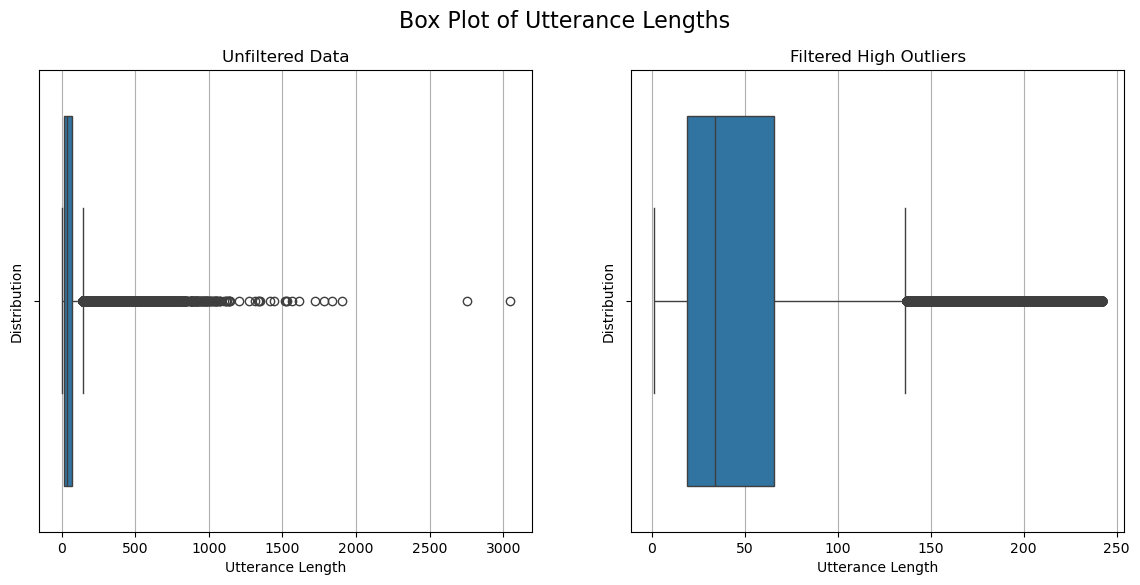

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Set the overall figure title
fig.suptitle('Box Plot of Utterance Lengths', fontsize=16)

# First subplot: horizontal box plot for all data
sns.boxplot(x=corpus_df["utter_lens"], orient='h', ax=axs[0])
axs[0].set_title('Unfiltered Data')
axs[0].set_xlabel('Utterance Length')
axs[0].set_ylabel('Distribution')
axs[0].grid(axis='x')

# Filter out high outliers (above `Q3 + 1.5 * IQR`)
Q3 = np.percentile(corpus_df["utter_lens"], 95)
IQR = stats.iqr(corpus_df["utter_lens"])
HIGH_OUTLIER_THRESHOLD = Q3 + 1.5 * IQR
filtered_utter_lens = corpus_df["utter_lens"][corpus_df["utter_lens"] <= HIGH_OUTLIER_THRESHOLD].values

# Second subplot: horizontal box plot for filtered data
sns.boxplot(filtered_utter_lens, orient='h', ax=axs[1])
axs[1].set_title('Filtered High Outliers')
axs[1].set_xlabel('Utterance Length')
axs[1].grid(axis='x')
axs[1].set_ylabel('Distribution')

# Adjust layout with spacing between subplots
plt.subplots_adjust(wspace=0.2)

# Show the plots
plt.show()

The box plot above demonstrates a right-skewed distribution, which is characteristic of a Pareto distribution. This skewness suggests that most utterances are relatively short, with a few substantially longer ones pulling the distribution to the right. However, when we zoom in by filtering out the high outliers, it becomes apparent that the remaining data does not fully align with the Pareto assumption. 

In the second plot, the outliers differ from those in the first because they are calculated based on the data with outliers already removed. Therefore, these second-round outliers should be interpreted with caution, as they don’t directly correspond to the original dataset’s outliers, and may reflect residual variation rather than a strict Pareto pattern.

SEE COMMENT
<!--
Old plot. Made a prettier and more informative one at a later section in the document.
```python
import matplotlib.pyplot as plt
from scipy.stats import iqr

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
bins = 100

# ax1 is the complete plot, including outliers
ax1.hist(corpus_df["utter_lens"].values, bins=bins)
ax1.title.set_text("Unfiltered")

# ax2 plots data, filtering high outliers

Q3 = max(corpus_df["utter_lens"].values) * 0.75
IQR = iqr(corpus_df["utter_lens"].values)
high_outliers = Q3 + 1.5 * IQR
ax2.hist(list(filter(lambda x : x < high_outliers, corpus_df["utter_lens"].values)), bins=bins)
ax2.title.set_text(f"High outliers ({high_outliers})")

# After calulating the high outliers, given how far the distribution is right-skewed, I chose an even lower value just for visualization purposes
custom_outliers = 500
ax3.hist(list(filter(lambda x : x < custom_outliers, corpus_df["utter_lens"].values)), bins=bins)
ax3.title.set_text(f"Custom outliers ({custom_outliers})")

fig.text(0, 0.5, "Number of utterance's with length X", va="center", rotation="vertical")
fig.text(0.5, 0, "Length of utterance's", ha="center")
plt.tight_layout()
plt.show()
```
-->

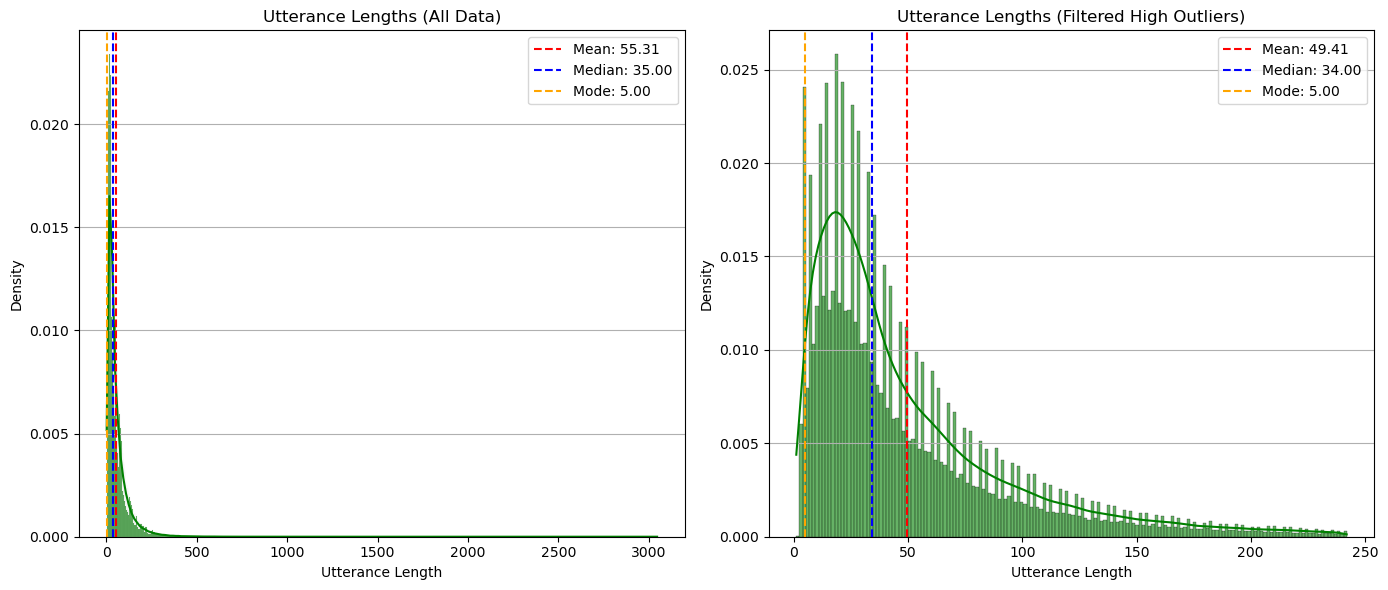

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Calculate mean, median, and mode for all data
mean_all = np.mean(corpus_df["utter_lens"])
median_all = np.median(corpus_df["utter_lens"])
mode_all = stats.mode(corpus_df["utter_lens"], axis=None, keepdims=False).mode

# First subplot: histogram for all data
sns.histplot(corpus_df["utter_lens"], kde=True, ax=axs[0], color='g', stat='density', alpha=0.6)
axs[0].axvline(mean_all, color='r', linestyle='--', label=f'Mean: {mean_all:.2f}')
axs[0].axvline(median_all, color='b', linestyle='--', label=f'Median: {median_all:.2f}')
axs[0].axvline(mode_all, color='orange', linestyle='--', label=f'Mode: {mode_all:.2f}')
axs[0].set_title('Utterance Lengths (All Data)')
axs[0].set_xlabel('Utterance Length')
axs[0].set_ylabel('Density')
axs[0].legend()
axs[0].grid(axis='y')

# Filter out high outliers (above `Q3 + 1.5 * IQR`)
Q3 = np.percentile(corpus_df["utter_lens"], 95)
IQR = stats.iqr(corpus_df["utter_lens"])
HIGH_OUTLIER_THRESHOLD = Q3 + 1.5 * IQR
filtered_utter_lens = corpus_df["utter_lens"][corpus_df["utter_lens"] <= HIGH_OUTLIER_THRESHOLD].values

# Calculate mean, median, and mode for filtered data
mean_filtered = np.mean(filtered_utter_lens)
median_filtered = np.median(filtered_utter_lens)
mode_filtered = stats.mode(filtered_utter_lens).mode

# Second subplot: histogram for filtered data
sns.histplot(filtered_utter_lens, kde=True, ax=axs[1], color='g', stat='density', alpha=0.6)
axs[1].axvline(mean_filtered, color='r', linestyle='--', label=f'Mean: {mean_filtered:.2f}')
axs[1].axvline(median_filtered, color='b', linestyle='--', label=f'Median: {median_filtered:.2f}')
axs[1].axvline(mode_filtered, color='orange', linestyle='--', label=f'Mode: {mode_filtered:.2f}')
axs[1].set_title('Utterance Lengths (Filtered High Outliers)')
axs[1].set_xlabel('Utterance Length')
axs[1].set_ylabel('Density')
axs[1].legend()
axs[1].grid(axis='y')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

SEE COMMENT
<!-- TODO: write a short describtion stating that hypotheses 1 will be tested at this point, using appropriate methods
TODO: see chatgpt thread for 

- als ik een distributie heb (hypothese is dat dit pareto distributie is, null variant is dit is niet ...), hoe test ik dit?
	Dit is eigenlijk niet meer dan de formule opzoeken voor het checken van pareto distributie en toepassen
	Om dit in hypothese te verwoorden:
	- wat is mijn verwachte distributie
	- wat is mijn reeele distributie
	- gebruik deze om de P waarde te berekenen (P waarde dat dit wel/geen pareto is) -->

## Hypotises Testing

| **ID** | **Hypothesis**                                                  | **Type**               |
|--------|-----------------------------------------------------------------|------------------------|
| H₀     | The lengths of the entries do not follow a Pareto distribution. | Null Hypothesis        |
| H₁     | The lengths of the entries follow a Pareto distribution.        | Alternative Hypothesis |

This table organizes your hypotheses with unique IDs, the hypothesis text, and their type (null hypothesis).

### Testing the Null Hypothesis

To test whether the lengths of the entries in the corpus follow a Pareto distribution, we take the following steps:

1. **Fit a Pareto Distribution:**
    - Using Maximum Likelihood Estimation (MLE), we fit a Pareto distribution to the data, estimating its shape parameter (α) and scale parameter (xₘ).
    - The Pareto distribution’s probability density function (PDF) is given by:
      $$f(x) = \frac{\alpha x_m^\alpha}{x^{\alpha+1}} \quad \text{for} \quad x \geq x_m$$
      where `α` is the shape parameter, and `xₘ` is the minimum possible value (scale).

2. **Goodness-of-Fit Tests:**
   - To evaluate the fit of the Pareto distribution to the data, we apply the following goodness-of-fit tests:
     - **Kolmogorov-Smirnov (K-S) Test:** This non-parametric test compares the empirical cumulative distribution function (CDF) of the data with the CDF of the fitted Pareto distribution.
     <!--
     - **Anderson-Darling Test:** A more sensitive test that emphasizes differences in the tails of the distribution, where deviations from the Pareto distribution may be more prominent.
     -->
     - **Chi-Square Goodness-of-Fit Test:** This test compares observed frequencies in different bins (based on the entry lengths) with expected frequencies under the Pareto distribution.

1. **Compute p-Values:**
   - For each test, we calculate the p-value. This tells us the probability of observing data as extreme as ours, assuming the null hypothesis is true.
   - If the p-value is less than a significance level of 0.05, we reject the null hypothesis, concluding that the data does not follow a Pareto distribution.

2. **Visualization:**
   - We plot the observed distribution of the corpus entry lengths as a histogram, overlaid with the PDF of the fitted Pareto distribution.
   - Additionally, we create a Q-Q plot to visualize how closely the quantiles of the observed data match the quantiles of a theoretical Pareto distribution.

3. **Conclusion:**
   - Based on the p-values and visualizations, we either reject or fail to reject the null hypothesis, providing insights into whether the lengths of the corpus entries align with a Pareto distribution.

#### Kolmogorov-Smirnov (K-S) Goodness-of-Fit Test

<!-- Sanity comments:

1. Kolmogorov-Smirnov (K-S) Test

    Imagine this: You're at an ice cream shop, and you want to see if the shop’s claim that "most people choose chocolate" is true. You have a list of ice cream choices from 100 customers. You want to compare this list to what the shop claims people pick most often.

    What does it do? The K-S test compares your actual data (what people picked) to a theoretical distribution (what the shop says people usually pick, like the Pareto or Normal distribution). It checks whether your data looks like it follows the claimed pattern. The test will give you a number (the "p-value"), and if this number is small, it means your data is very different from the claimed pattern.

    When to use it? You use the K-S test when you want to compare your data to a theoretical distribution to see if they match up. It’s great for small datasets or when you don’t want to group your data into bins (like a histogram).

2. Anderson-Darling (A-D) Test

    Imagine this: You're playing a video game, and you want to see if the game is fair. The game claims that it gives you a certain number of points randomly, but you're suspicious! So, you record your points and compare them to what the game says the points should look like.

    What does it do? The Anderson-Darling test is similar to the K-S test but gives more weight to differences in the tails (the extreme values in your data). It checks how well your data fits a certain distribution, paying extra attention to how extreme values behave.

    When to use it? The A-D test is useful when you're especially interested in how well a distribution matches the extreme values in your data. If you care a lot about whether very small or very large values fit well with the distribution, A-D is a better choice than the K-S test. It's often used in similar situations as the K-S test but is a bit more powerful for detecting differences.

3. Chi-Square Test

    Imagine this: You’re organizing a party, and you predict that out of 100 people, 50 will bring cake, 30 will bring chips, and 20 will bring juice. After the party, you look at what people actually brought and compare it to your prediction.

    What does it do? The Chi-Square test checks whether the actual frequencies (how many people brought cake, chips, and juice) match what you expected. It groups your data into categories (or "bins") and sees if the actual counts are close to what you predicted.

    When to use it? You should use the Chi-Square test when you have data grouped into categories (like bins in a histogram) and you want to see if the observed frequencies in each bin match the expected ones. It’s often used when dealing with categorical data or when your data naturally fits into groups.

---
Summary of When to Use Each Test:

    Kolmogorov-Smirnov (K-S): Use this when you want a simple test to compare your data to a specific distribution (like a Pareto, Normal, etc.). It’s great for general goodness-of-fit testing and works well with small samples.
    Anderson-Darling (A-D): Use this when you care more about the extreme values (tails) in your data and want a stronger test than K-S. It’s good when the tails of the distribution are important to you.
    Chi-Square: Use this when you have grouped data (like in categories or bins) and want to compare the observed frequencies to the expected ones. It’s perfect for testing if observed categories match your predictions.
-->

In [22]:
import scipy.stats as stats

# Fit a Pareto distribution using MLE. See docstring:
# "Return estimates of shape (if applicable), location, and scale parameters from data. The default estimation method is Maximum Likelihood Estimation (MLE) ..."
shape, loc, scale = stats.pareto.fit(corpus_df['utter_lens'], floc=0)

print(f"α  \t{shape:.2f}")
print(f"xₘ \t{scale:.2f}")

α  	0.28
xₘ 	1.00


The small shape parameter α (0.28) suggests that the utterance lengths distribution has a long tail, which implies that there are many utterances with significantly larger lengths than the average. In other words, while most utterances are short, there are some much longer ones that pull the average upwards.

<!-- Sanity comments:
"In a Pareto distribution, smaller values of α indicate a longer tail, meaning there are more large values in the distribution (extreme events are more frequent). A longer tail means that the distribution is more spread out, with a significant portion of the probability in the higher values.

Since your α is 0.28, which is quite small, it suggests that your data has a very long tail—meaning there are many larger values (utterance lengths) in your dataset that occur more often than you’d expect in, say, a normal distribution."
-->

Pareto distributions are known for having a long tail, where a small number of values contribute to a large portion of the distribution. This is consistent with the nature of conversational data, where some utterances may be significantly longer than others. So this intuitively makes sense.

It also makes it likeley that the Pareto distribution is a good fit for the lengths of the utterances in the movie dialogue corpus. However, the goodness-of-fit tests will provide more concrete evidence to support this conclusion.

In [23]:
# Kolmogorov-Smirnov (K-S)
D, p_value = stats.kstest(corpus_df['utter_lens'], 'pareto', args=(shape, loc, scale))
print(f"K-S test statistic: {D}")
print(f"K-S p-value: {p_value}")

K-S test statistic: 0.38319148140890663
K-S p-value: 0.0


- [geeksforgeeks.org](https://www.geeksforgeeks.org/kolmogorov-smirnov-test-ks-test/) on the Kolmogorov-Smirnov Test (KS Test):
> "If the p-value is less than the significance level, reject the null hypothesis, indicating that the two samples come from different distributions."

In [24]:
significance_level = 0.05
if p_value < significance_level:
    print("Reject the null hypothesis: the distribution does not follow a Pareto distribution.")
else:
    print("Fail to reject the null hypothesis: the distribution may follow a Pareto distribution.")

Reject the null hypothesis: the distribution does not follow a Pareto distribution.


The low p-value indicates that the data does not follow a Pareto distribution. However, one test alone may not provide a definitive conclusion. Therefore, we will also consider the results of the Chi-Square test to make a more informed decision.

#### Pearson's Chi Square Goodness-of-Fit Test

SEE COMMENT
<!-- Comments
https://www.scribbr.com/wp-content/uploads/2022/05/Chi-square-table.pdf

I tried to do the test manually but I got unexpected results. The result was not the same as the scipy implementation (which I trust more tbh)

I will be following the [unit on khanacademy.org](https://www.khanacademy.org/math/statistics-probability/inference-categorical-data-chi-square-tests/chi-square-goodness-of-fit-tests/v/pearson-s-chi-square-test-goodness-of-fit) for implementing the pearson's Chi Square GOF test.



First we need to get the actual observed values, which we have in the form of `corpus_df['utter_length']`. Lets say that the array looks like this:
observed = [ 51, 23, 12, 5, 3, 2, 1, 1, 1, 1 ]

We use this example because the sum(observed) is 100, which is a nice round number. Plus this array is a good example of a pareto distribution, where approximitly 80% of the values are in the first 20% of the array.

Secondly we need an array representing the pareto distribution from 0 to 100 in terms of percentages. The array needs to be of equal length to the observed array. We then calculate the χ² as followed:
x2 = sum([ (o - e) ** 2 / e for o, e in zip(observed, expected) ])

---
Manual implementation for chi-square:

```python
import numpy as np
from typing import Iterable

def manual_chi_square(observed_freq: Iterable, hypothises_freq: Iterable) -> float:
    """
    Calculate the chi-square statistic for given observed and hypothesized frequencies.

    ## Parameters:
        `observed_freq` (`Iterable`): An iterable of real observed counts.
        `hypothises_freq` (`Iterable`): An iterable of hypothesized frequencies in percentages (between 0 and 1 inclusive). 

    ## Returns:
        `float`: The chi-square statistic.  

    ## Raises:
        `ValueError`: If the lengths of observed and hypothesized frequencies are not equal.
    """

    if not len(observed_freq) == len(hypothises_freq):
        raise ValueError("The observed and hypothises frequencies must have equal lengths")

    expected_freq = np.array([
        observed_freq.sum() * h
        for h in hypothises_freq
    ])

    chi_square = sum([ 
        (o - e) ** 2 / e 
        if e > 0 else 0 # Avoid division by zero
        for o, e in zip(observed_freq, expected_freq)
    ])
    return chi_square


# Example usage
# observed = np.array([ 30, 14, 34, 45, 57, 20 ])
# hypothes = np.array([ 10, 10, 15, 20, 30, 15 ]) / 100
# chi_square = manual_chi_square(observed, hypothes) # Shoud approximate 11.4

# print(f"Observed frequencies: {observed}")
# print(f"Hypothesized frequencies: {hypothes}")
# print(f"Chi-square statistic: {chi_square}")

bins = 5
observed = np.histogram(corpus_df['utter_lens'], bins=bins)[0]
# print(len(observed), observed)

# alpha = 1.16 # Pareto index for 80/20 rule: "the 80–20 (4:1) rule corresponds to α = log(5)/log(4) ≈ 1.16" https://en.wikipedia.org/wiki/Pareto_index
pareto_cumulative_distribution = stats.pareto.cdf(observed, scale)
pareto_cumulative_distribution /= pareto_cumulative_distribution.sum()
# print(len(pareto_cumulative_distribution), sum(pareto_cumulative_distribution), pareto_cumulative_distribution)

chi_square = manual_chi_square(observed, pareto_cumulative_distribution)

print(f"Chi-square statistic: {chi_square}")
```

-->

In [25]:
# Adjust the numbers bellow as needed
n_bins_to_test = 100 
step = 10
bin_sizes_to_test = [ b for b in range(step, n_bins_to_test + step - 1, step) ]
bin_sizes_to_test

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [40]:
log_intermediate_results = False # Set to True to log intermediate results

In [41]:
# Step 1: Estimate the parameters of the Pareto distribution
shape, loc, scale = stats.pareto.fit(corpus_df['utter_lens'])  # set floc=0 to fix the location parameter if desired
if log_intermediate_results:
    print(f"α (shape) \t{shape:.2f}")
    print(f"xₘ (scale) \t{scale:.2f}")
    print()

for bins in bin_sizes_to_test:
    # Step 2: Set up the bins and calculate observed frequencies
    observed_counts, bin_edges = np.histogram(corpus_df['utter_lens'], bins=bins)
    if log_intermediate_results:
        print(f"Observed counts: {observed_counts}")
        print()

    # Step 3: Calculate the expected frequencies based on the Pareto distribution
    expected_counts = []
    probs = []
    for i in range(bins):
        # Calculate the cumulative probability for each bin range
        lower_bound = bin_edges[i]
        upper_bound = bin_edges[i + 1]
        prob = stats.pareto.cdf(upper_bound, shape, loc=loc, scale=scale) - stats.pareto.cdf(lower_bound, shape, loc=loc, scale=scale)
        probs.append(prob)

        # Multiply by the total sample size to get expected count
        expected_counts.append(prob * len(corpus_df['utter_lens']))

    if log_intermediate_results:
        print(f"Expected probabilities: {probs} (sums to {sum(probs)})")
        print(f"Expected counts: {expected_counts}")
        print()

    # Step 4: Perform the Chi-Square test
    chi2_stat, p_value = stats.chisquare(f_obs=observed_counts, f_exp=expected_counts)

    if log_intermediate_results:
        print(f"Chi-Square Statistic: {chi2_stat}")
        print(f"P-value: {p_value}")
        print()


    if p_value < significance_level:
        print(f"Reject H₀ for {bins} bins (distribution does not follow a Pareto distribution).")
    else:
        print(f"Fail to reject H₀ for {bins} bins (distribution may follow a Pareto distribution).")

    if log_intermediate_results:
        print("=============================================")
        print()

Reject H₀ for 10 bins (distribution does not follow a Pareto distribution).
Reject H₀ for 20 bins (distribution does not follow a Pareto distribution).
Reject H₀ for 30 bins (distribution does not follow a Pareto distribution).
Reject H₀ for 40 bins (distribution does not follow a Pareto distribution).
Reject H₀ for 50 bins (distribution does not follow a Pareto distribution).
Reject H₀ for 60 bins (distribution does not follow a Pareto distribution).
Reject H₀ for 70 bins (distribution does not follow a Pareto distribution).
Reject H₀ for 80 bins (distribution does not follow a Pareto distribution).
Reject H₀ for 90 bins (distribution does not follow a Pareto distribution).
Reject H₀ for 100 bins (distribution does not follow a Pareto distribution).


The Chi-square test results consistently show very high test statistics and a p-value of 0.0 across all bin counts, indicating strong evidence against the null hypothesis. This confirms that the observed distribution of utterance lengths does not follow a Pareto distribution.

#### Visualization

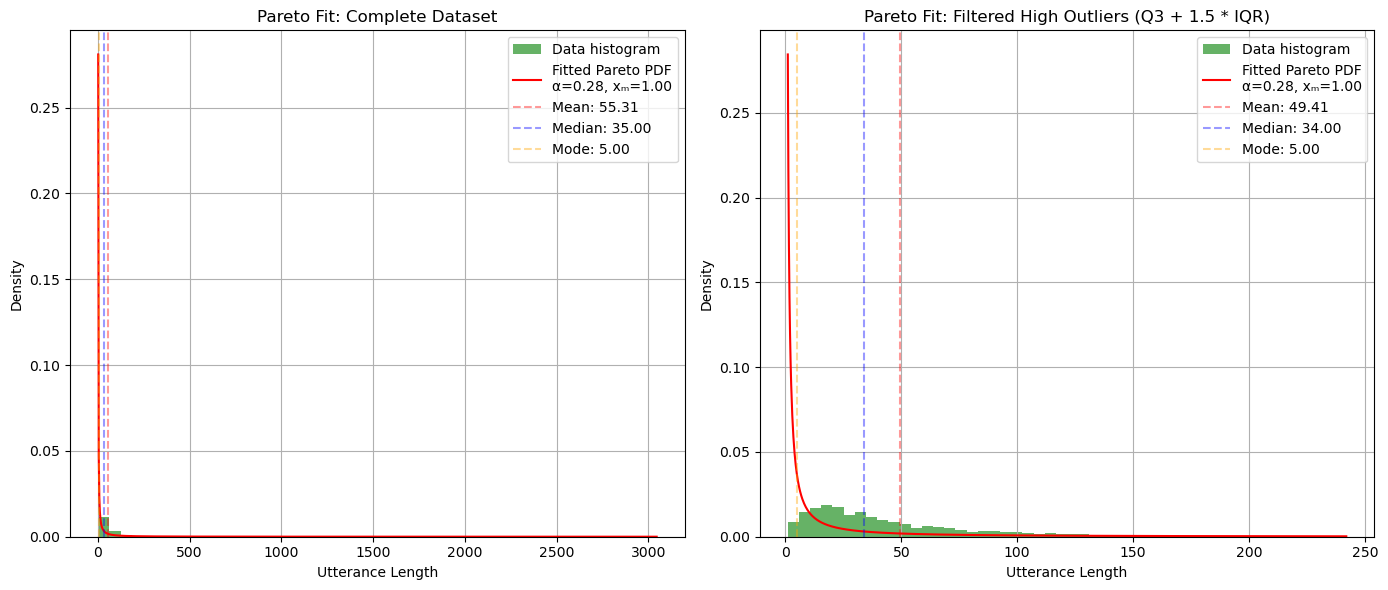

In [28]:
import matplotlib.pyplot as plt

# Extract the utterance lengths from the dataframe
# utter_lens = corpus_df["utter_lens"].values

# Define a function to fit Pareto distribution and plot
def fit_and_plot_pareto(data, bins, ax, title):
    # Fit a Pareto distribution using MLE. See docstring:
    # "Return estimates of shape (if applicable), location, and scale parameters from data. The default estimation method is Maximum Likelihood Estimation (MLE) ..."
    shape_param, loc, scale_param = stats.pareto.fit(data, floc=0)

    # Generate a range of x values for plotting the fitted PDF
    x = np.linspace(min(data), max(data), 1000)

    # Calculate the PDF using the estimated parameters
    pdf_fitted = stats.pareto.pdf(x, shape_param, loc, scale_param)

    # Plot histogram of the data and the fitted Pareto distribution
    ax.hist(data, bins=bins, density=True, alpha=0.6, color='g', label='Data histogram')
    ax.plot(x, pdf_fitted, 'r-', label=f'Fitted Pareto PDF\nα={shape_param:.2f}, xₘ={scale_param:.2f}')
    ax.set_title(title)
    ax.set_xlabel('Utterance Length')
    ax.set_ylabel('Density')

    # Plot the mean, median, and mode line on the histogram
    mean = np.mean(data)
    median = np.median(data)
    mode = stats.mode(data).mode
    ax.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}', alpha=0.4)
    ax.axvline(median, color='b', linestyle='--', label=f'Median: {median:.2f}', alpha=0.4)
    ax.axvline(mode, color='orange', linestyle='--', label=f'Mode: {mode:.2f}', alpha=0.4)

    ax.grid()
    ax.legend()

# Set up subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# First plot: complete dataset
fit_and_plot_pareto(corpus_df["utter_lens"].values, 50, axs[0], 'Pareto Fit: Complete Dataset')

# Second plot: filter out high outliers (above `Q3 + 1.5 * IQR`)
Q3 = np.percentile(corpus_df["utter_lens"], 95)
IQR = stats.iqr(corpus_df["utter_lens"])
HIGH_OUTLIER_THRESHOLD = Q3 + 1.5 * IQR
filtered_utter_lens = corpus_df["utter_lens"][corpus_df["utter_lens"] <= HIGH_OUTLIER_THRESHOLD].values
fit_and_plot_pareto(filtered_utter_lens, 50, axs[1], 'Pareto Fit: Filtered High Outliers (Q3 + 1.5 * IQR)')

# Show the plots
plt.tight_layout()
plt.show()

The visual plot, especially the second one, confirms the results of the statistical tests, showing that the data does not follow a Pareto distribution. 

With high outliers filtered, the second plot provides a lower-resolution view in which it becomes apparent that the data is heavily right-skewed rather than Pareto-distributed, as the mid-range values lack the extreme tails characteristic of a true Pareto distribution. When examining the entire distribution with all outliers included, this distinction is harder to discern, as the extreme values dominate the plot and obscure the true underlying pattern.

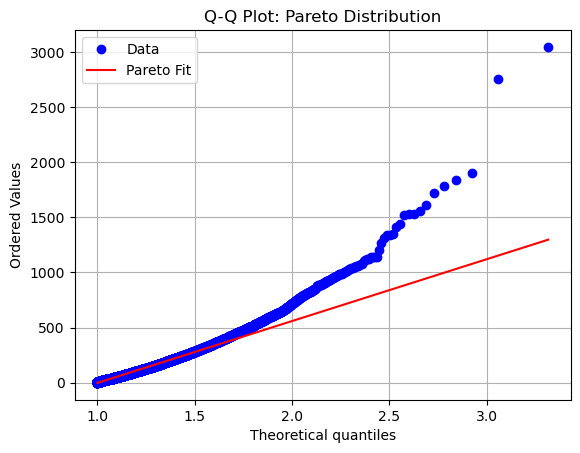

In [29]:
shape, loc, scale = stats.pareto.fit(corpus_df['utter_lens'])

# Create the Q-Q plot
stats.probplot(corpus_df['utter_lens'], dist="pareto", sparams=(shape,), plot=plt)
plt.title('Q-Q Plot: Pareto Distribution')
plt.legend(['Data', 'Pareto Fit'])
plt.grid()
plt.show()

The Q-Q plot shows a clear deviation from the Pareto distribution line, particularly in the tails, where the observed data points diverge significantly. This visual mismatch supports the statistical test outcomes, confirming that the data does not align with the expected Pareto distribution. The heavy skewness observed indicates a different distribution shape, reinforcing the conclusion from the tests.

### Conclusion

The analysis shows that the distribution of movie utterance lengths does not follow a Pareto distribution. This conclusion is supported by the outcomes of both statistical tests (K-S and Chi-square), each rejecting the Pareto hypothesis. The visual plots further reinforce this, with clear deviations from Pareto characteristics, particularly in the Q-Q plot and in the filtered view of the data, which highlight a heavily right-skewed pattern rather than a true Pareto distribution.

## Sources

Inspiration for vectorization methods:
https://neptune.ai/blog/vectorization-techniques-in-nlp-guide

Explanation of cumulative explained variance:
https://en.wikipedia.org/wiki/Explained_variation

Statistical hypothesis testing:
https://en.wikipedia.org/wiki/Statistical_hypothesis_test

Perplexity thread used:
https://www.perplexity.ai/collections/staistical-analysis-of-semanti-kIxRGTaZQYqP4ZwkAvJLtQ

```BibTex
@InProceedings{Danescu-Niculescu-Mizil+Lee:11a,
    author={Cristian Danescu-Niculescu-Mizil and Lillian Lee},
    title={Chameleons in imagined conversations:
        A new approach to understanding coordination of linguistic style in dialogs.},
    booktitle={Proceedings of the, Workshop on Cognitive Modeling and Computational Linguistics, ACL 2011},
    year={2011},
    url={https://www.cs.cornell.edu/~cristian/Chameleons_in_imagined_conversations.html}
}

@article{CHU201913,
    title = {A review of goodness of fit tests for Pareto distributions},
    journal = {Journal of Computational and Applied Mathematics},
    volume = {361},
    pages = {13-41},
    year = {2019},
    issn = {0377-0427},
    doi = {https://doi.org/10.1016/j.cam.2019.04.018},
    url = {https://www.sciencedirect.com/science/article/pii/S0377042719302067},
    author = {J. Chu and O. Dickin and S. Nadarajah},
    keywords = {Economics, Finance, Power, Simulation},
    abstract = {Pareto distributions are the most popular models in economics and finance. Hence, it is essential to have a wide spectrum of tools for checking their goodness of fit to a given data set. This paper provides the first review of known goodness of fit tests for Pareto distributions. Over twenty tests are reviewed. Their powers are compared by simulation.}
    }
```